In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/Users/pawakapan/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
n = 50

x0 = np.random.multivariate_normal([0,0],[[1,0],[0,1]],size=[n])
x1 = np.random.randint(0,100,size=[n])*2.0*np.pi/100.0
x1 = 4.0*np.transpose([np.sin(x1),np.cos(x1)])

y0 = np.zeros([n])
y1 = np.ones([n])

data = np.concatenate((x0,x1))
labels = np.concatenate((y0,y1))

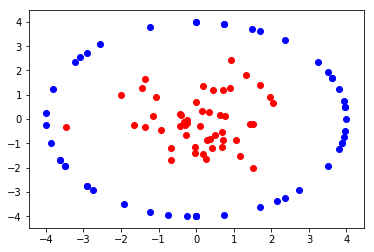

In [3]:
plt.scatter(data[labels==0][:,0],data[labels==0][:,1],c="r")
plt.scatter(data[labels==1][:,0],data[labels==1][:,1],c="b")
plt.show()

In [4]:
indices = np.random.binomial(1,0.5,size=[len(data)])

tr_data = data[indices==1]
ts_data = data[indices==0]
tr_labels = labels[indices==1]
ts_labels = labels[indices==0]

In [5]:
print(len(tr_data))
print(len(ts_data))

54
46


In [6]:
x = tf.placeholder(tf.float32,[None,2])
y = tf.placeholder(tf.float32,[None])

W1 = tf.Variable(tf.random_normal([2,5],stddev=0.1))
b1 = tf.Variable(tf.random_normal([5]))

W2 = tf.Variable(tf.random_normal([5,5],stddev=0.1))
b2 = tf.Variable(tf.random_normal([5]))

W3 = tf.Variable(tf.random_normal([5,1],stddev=0.1))
b3 = tf.Variable(tf.random_normal([1]))

x1 = tf.matmul(x,W1)+b1
x2 = tf.matmul(tf.nn.tanh(x1),W2)+b2
x3 = tf.matmul(tf.nn.tanh(x2),W3)+b3

output = tf.nn.sigmoid(x3)

y_ = tf.reshape(y,[-1,1])
loss = -tf.reduce_mean(y_*tf.log(output) + (1-y_)*tf.log(1-output))

train_op = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

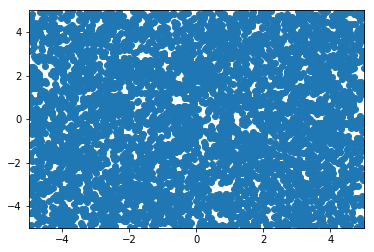

In [7]:
vis_data = np.transpose([np.random.uniform(-1.0,1.0,size=[5000])*5.0,np.random.uniform(-1.0,1.0,size=[5000])*5.0])
plt.scatter(vis_data[:,0],vis_data[:,1])
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

LOSS : 0.6919564
0.5740740740740741


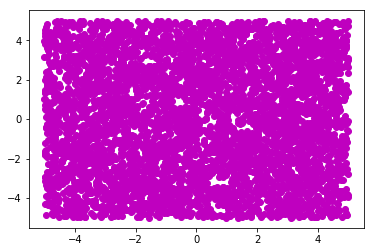

LOSS : 0.49482018
0.7592592592592593


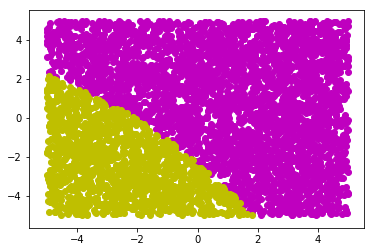

LOSS : 0.25172934
0.9074074074074074


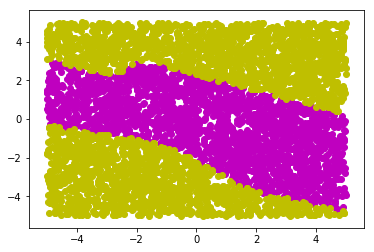

LOSS : 0.05854996
1.0


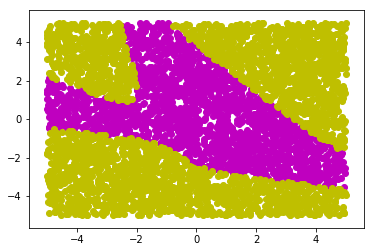

LOSS : 0.020226775
1.0


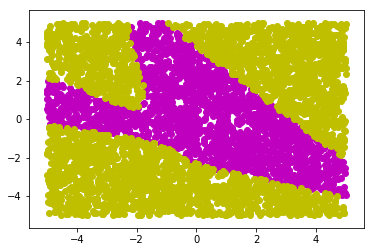

LOSS : 0.008922688
1.0


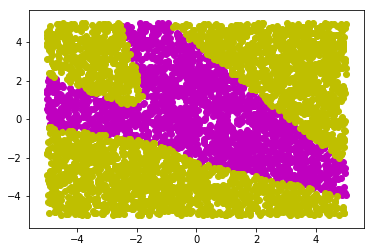

LOSS : 0.0054461155
1.0


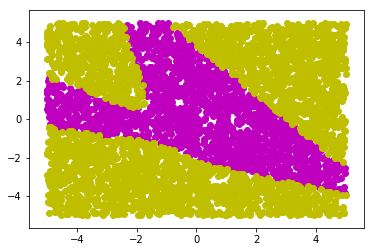

LOSS : 0.003648779
1.0


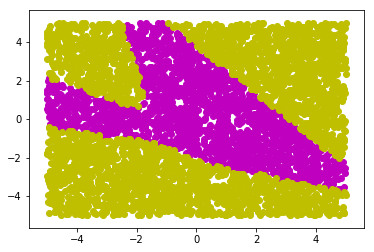

LOSS : 0.0028976554
1.0


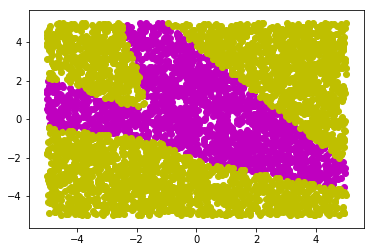

LOSS : 0.0024248166
1.0


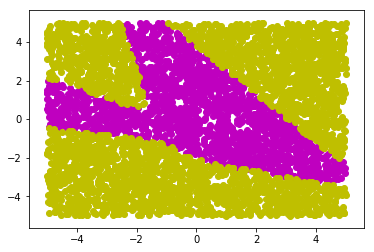

In [8]:
num_iter = 100

for i in range(num_iter):
    
    sess.run(train_op,feed_dict={x:tr_data,y:tr_labels})
    
    if i % (num_iter/10) == 0:

        print("LOSS : " + str(sess.run(loss,feed_dict={x:tr_data,y:tr_labels})))
        tr_preds = np.reshape(sess.run(output,feed_dict={x:tr_data}),[-1])
        ts_preds = np.reshape(sess.run(output,feed_dict={x:ts_data}),[-1])

        tr_acc = np.mean(np.equal(tr_preds>0.5,tr_labels>0.5))
        print(tr_acc)
    
        vis_preds = sess.run(output,feed_dict={x:vis_data})
        vis_preds = np.where(np.reshape(vis_preds,[-1])>0.5,1,0)
        plt.scatter(vis_data[vis_preds==0][:,0],vis_data[vis_preds==0][:,1],c="m")
        plt.scatter(vis_data[vis_preds==1][:,0],vis_data[vis_preds==1][:,1],c="y")
        plt.show()

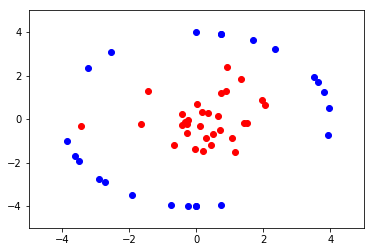

In [9]:
plt.scatter(tr_data[tr_labels==0][:,0],tr_data[tr_labels==0][:,1],c="r")
plt.scatter(tr_data[tr_labels==1][:,0],tr_data[tr_labels==1][:,1],c="b")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

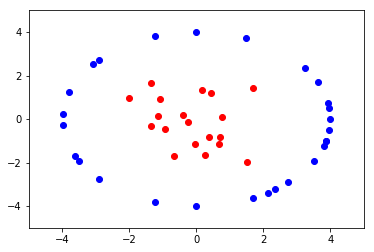

In [10]:
plt.scatter(ts_data[ts_labels==0][:,0],ts_data[ts_labels==0][:,1],c="r")
plt.scatter(ts_data[ts_labels==1][:,0],ts_data[ts_labels==1][:,1],c="b")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [11]:
ts_acc = np.mean(np.equal(ts_preds>0.5,ts_labels>0.5))
print(ts_acc)

0.8260869565217391


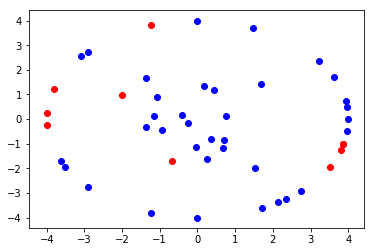

In [12]:
preds = np.reshape(sess.run(output,feed_dict={x:ts_data}),[-1])
preds = np.where(preds>0.5,1,0)

plt.scatter(ts_data[preds==ts_labels][:,0],ts_data[preds==ts_labels][:,1],c="b")
plt.scatter(ts_data[preds!=ts_labels][:,0],ts_data[preds!=ts_labels][:,1],c="r")
plt.show()

In [13]:
wrong_preds = ts_data[preds!=ts_labels]

In [14]:
wrong_preds

array([[-2.01436861,  0.98201886],
       [-0.66783903, -1.68816389],
       [-3.80422607,  1.23606798],
       [-3.99210691, -0.25116208],
       [ 3.50522672, -1.9270147 ],
       [ 3.87433264, -0.99475955],
       [ 3.87433264, -0.99475955],
       [-3.99210691,  0.25116208],
       [ 3.80422607, -1.23606798],
       [-1.23606798,  3.80422607]])

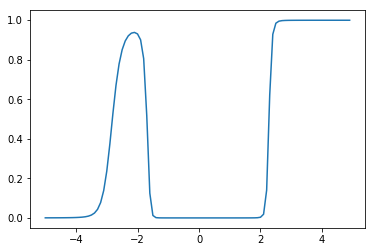

In [15]:
outputs = []
testrange = np.arange(-5.0,5.0,0.1)
for x_ in testrange:
    output_ = sess.run(output,feed_dict={x:[[x_,wrong_preds[0][1]]]})[0]
    outputs.append(output_)
    
plt.plot(testrange,outputs)
plt.show()

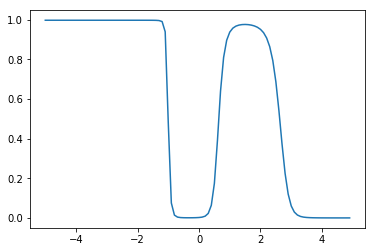

In [16]:
outputs = []
testrange = np.arange(-5.0,5.0,0.1)
for y_ in testrange:
    output_ = sess.run(output,feed_dict={x:[[wrong_preds[0][0],y_]]})[0]
    outputs.append(output_)
    
plt.plot(testrange,outputs)
plt.show()

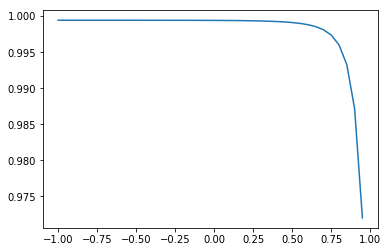

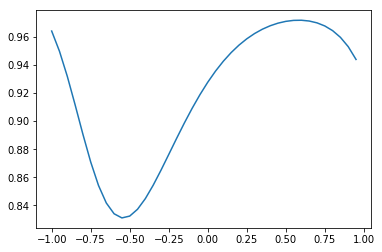

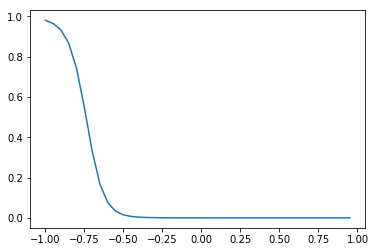

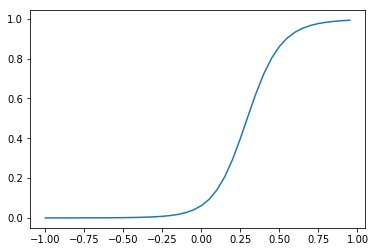

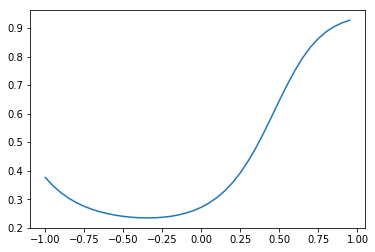

In [17]:
for i in range(5):
    outputs = []
    testrange = np.arange(-1.0,1.0,0.05)
    for x1_i in testrange:
        x1_ = sess.run(tf.nn.tanh(x1),feed_dict={x:[wrong_preds[0]]})
        x1_[0][i] = x1_i
        output_ = sess.run(tf.nn.sigmoid(tf.matmul(tf.nn.tanh(tf.matmul(x1_,W2)+b2),W3)+b3))
        outputs.append(output_)
    plt.plot(testrange,np.reshape(outputs,[-1]))
    plt.show()

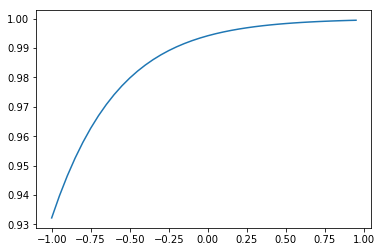

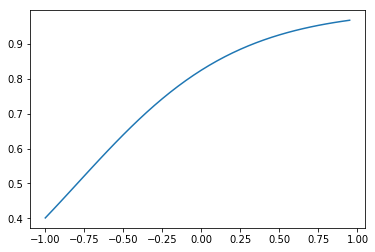

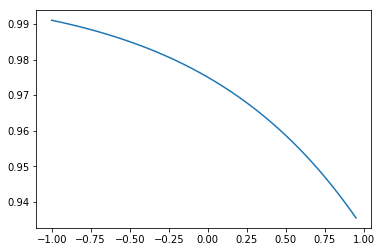

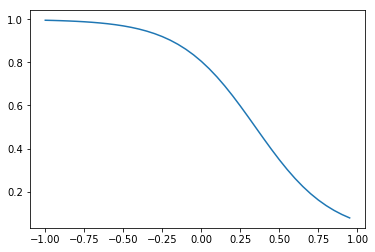

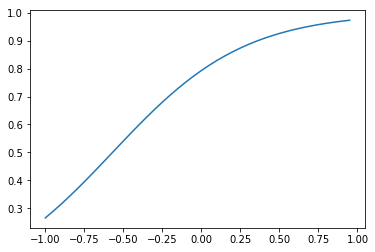

In [18]:
for i in range(5):
    outputs = []
    testrange = np.arange(-1.0,1.0,0.05)
    for x2_i in testrange:
        x2_ = sess.run(tf.nn.tanh(x2),feed_dict={x:[wrong_preds[0]]})
        x2_[0][i] = x2_i
        output_ = sess.run(tf.nn.sigmoid(tf.matmul(x2_,W3)+b3))
        outputs.append(output_)
    plt.plot(testrange,np.reshape(outputs,[-1]))
    plt.show()

In [19]:
x1 = tf.matmul(x,W1)+b1
x1_a = tf.nn.tanh(x1)
x2 = tf.matmul(x1_a,W2)+b2
x2_a = tf.nn.tanh(x2)
x3 = tf.matmul(x2_a,W3)+b3

output = tf.nn.sigmoid(x3)

In [20]:
print(sess.run(tf.gradients(x3,x2_a),feed_dict={x:[wrong_preds[0]]}))

[array([[ 2.5206804,  1.9498647, -1.0444233, -4.095917 ,  2.3602397]],
      dtype=float32)]


In [21]:
print(sess.run(tf.gradients(x3,x2),feed_dict={x:[wrong_preds[0]]}))

[array([[ 2.8666607e-04,  1.3595936e+00, -1.6135843e-04, -3.7419617e+00,
         1.6684549e+00]], dtype=float32)]


In [22]:
print(sess.run(tf.gradients(x3,x1_a),feed_dict={x:[wrong_preds[0]]}))

[array([[-20.417252 ,  -4.4317417, -14.197376 ,   7.6679626,   1.8320749]],
      dtype=float32)]


In [23]:
print(sess.run(tf.gradients(x3,x1),feed_dict={x:[wrong_preds[0]]}))

[array([[-0.04334944, -0.0217157 , -2.682425  ,  4.908164  ,  0.04555875]],
      dtype=float32)]
